### PYTORCH WORKFLOW

Cover to topic:
1. Prepare the data
2. Build model
3. Fitting the model to data (training)
4. Making prediction and evaluating a model (Inference)
5. Putting it all together


In [30]:
import torch
from torch import nn #contain all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 1. DATA (PREPARING AND LOADING)

data can be almost anything... in machine learning.

*Excel spreadsheet
* Images of any kind
* Videos
* Audio like song or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data and convert into a numerical representation(tensors)
2. Build a model to learn patterns in that numerical representation

To showcase this, I will create a *known* data using the **linear regression formula**

We'll use a linear regression formula to make a straight line with known parameters.



In [31]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02


X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
len(X), len (y)

(50, 50)

In [33]:
# Create a train/ test split

train_split = int(0.8 * len(X)) #80% of data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

"Visualize! Visualize! Visualize!"

In [45]:
def plot_prediction(train_data = X_train,
                    train_labels= y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

# Plots training data, test data and compares predictions.
  plt.figure(figsize=(8, 5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
      # Plot prediction if it exist
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12})

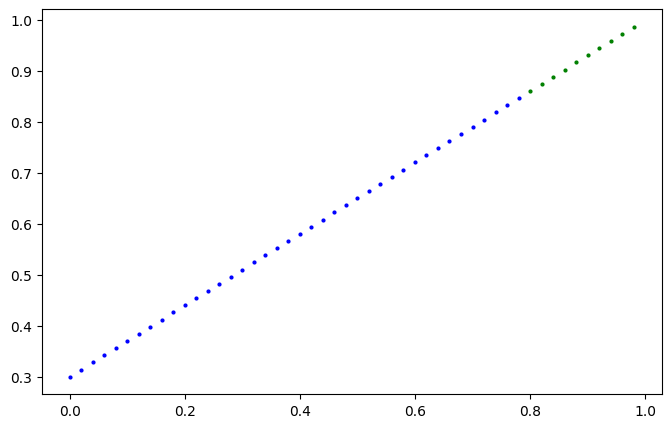

In [46]:
plot_prediction()

## Building model

This will be my first PyTorch model

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everthing in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # Use nn.Linear()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias #Linear regression formula


